In [ ]:
import cv2
import numpy as np

nose_cascade = cv2.CascadeClassifier("haarcascade_mcs_nose.xml")

if nose_cascade.empty():
  raise IOError('Unable to load the nose cascade classifier xml file')

cap = cv2.VideoCapture(0)
ds_factor = 0.5

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    nose_rects = nose_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in nose_rects:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)
        break

    cv2.imshow('Nose Detector', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

SystemError: ignored

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

Saving kaggle.json to kaggle.json
 95% 175M/185M [00:02<00:00, 81.3MB/s]
100% 185M/185M [00:02<00:00, 91.3MB/s]


In [ ]:
!rm -r "/content/by_class"

In [ ]:
!ls "/content/character_dataset/train/30" | wc -l

ls: cannot access '/content/character_dataset/train/30': No such file or directory
0


In [ ]:
!wget "https://s3.amazonaws.com/nist-srd/SD19/by_class.zip"

--2020-07-06 07:12:15--  https://s3.amazonaws.com/nist-srd/SD19/by_class.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.86.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.86.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1031576378 (984M) [application/zip]
Saving to: ‘by_class.zip’

by_class.zip        100%[===================>] 983.79M  15.9MB/s    in 62s     

2020-07-06 07:13:18 (15.8 MB/s) - ‘by_class.zip’ saved [1031576378/1031576378]



In [ ]:
!unzip by_class.zip

Streaming output truncated to the last 5000 lines.
  inflating: by_class/47/hsf_0/hsf_0_00016.png  
  inflating: by_class/47/hsf_0/hsf_0_00158.png  
  inflating: by_class/47/hsf_0/hsf_0_00345.png  
  inflating: by_class/47/hsf_0/hsf_0_00368.png  
  inflating: by_class/47/hsf_0/hsf_0_00171.png  
  inflating: by_class/47/hsf_0/hsf_0_00110.png  
  inflating: by_class/47/hsf_0/hsf_0_00365.png  
  inflating: by_class/47/hsf_0/hsf_0_00152.png  
  inflating: by_class/47/hsf_0/hsf_0_00062.png  
  inflating: by_class/47/hsf_0/hsf_0_00257.png  
  inflating: by_class/47/hsf_0/hsf_0_00005.png  
  inflating: by_class/47/hsf_0/hsf_0_00301.png  
  inflating: by_class/47/hsf_0/hsf_0_00356.png  
  inflating: by_class/47/hsf_0/hsf_0_00199.png  
  inflating: by_class/47/hsf_0/hsf_0_00024.png  
  inflating: by_class/47/hsf_0/hsf_0_00091.png  
  inflating: by_class/47/hsf_0/hsf_0_00041.png  
  inflating: by_class/47/hsf_0/hsf_0_00106.png  
  inflating: by_class/47/hsf_0/hsf_0_00116.png  
  inflating: by_cl

In [ ]:
import os
import sys
import shutil
import random
import cv2
from google.colab.patches import cv2_imshow
# LOAD LIBRARIES
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
main="by_class"
for f in sorted(os.listdir(main)):
  # cv2_imshow(cv2.imread("by_class/"+f+"/hsf_1/hsf_1_00001.png"))
  fol=main+'/'+f
  subl=os.listdir(fol)
  for sub in subl:
    st=fol+'/'+sub
    try:
      pics=os.listdir(st)
      for pic in pics:
        shutil.move(st+'/'+pic,fol+'/'+pic)
      os.removedirs(st)
    except:
      os.remove(st)

In [ ]:
!mkdir "character_dataset"
!mkdir "character_dataset/train"
!mkdir "character_dataset/test"
train="character_dataset/train"
test="character_dataset/test"
for f in sorted(os.listdir(main)):
  # cv2_imshow(cv2.imread("by_class/"+f+"/hsf_1/hsf_1_00001.png"))
  pics=os.listdir(main+'/'+f)
  random.shuffle(pics)
  n=min(5200,len(pics))
  a=(n*5000)//5200
  Train=pics[:a]
  Test=pics[a:n]
  ct=1
  os.mkdir(test+'/'+f)
  for pic in Test:
    img=cv2.imread(main+'/'+f+'/'+pic,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(28,28))
    cv2.imwrite(test+'/'+f+"/%04d"%ct+".jpg",img)
    ct+=1
    # shutil.move(main+'/'+f+'/'+pic,test+'/'+f+'/'+pic)
  ct=1
  os.mkdir(train+'/'+f)
  for pic in Train:
    img=cv2.imread(main+'/'+f+'/'+pic,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(28,28))
    cv2.imwrite(train+'/'+f+"/%04d"%ct+".jpg",img)
    ct+=1
    # shutil.move(main+'/'+f+'/'+pic,train+'/'+f+'/'+pic)

In [ ]:
# for fol in os.listdir(train):
#   cnt=0
#   os.mkdir("/content/character_dataset/train/"+fol)
#   for pic in os.listdir(train+'/'+fol):
#     img=cv2.imread(train+'/'+fol+'/'+pic,cv2.IMREAD_GRAYSCALE)
#     img=cv2.resize(img,(28,28))
#     cv2.imwrite("/content/character_dataset/train/"+fol+"/%04d"%cnt+".jpg",img)
#     cnt+=1
# for fol in os.listdir(test):
#   cnt=0
#   os.mkdir("/content/character_dataset/test/"+fol)
#   for pic in os.listdir(test+'/'+fol):
#     img=cv2.imread(test+'/'+fol+'/'+pic,cv2.IMREAD_GRAYSCALE)
#     img=cv2.resize(img,(28,28))
#     cv2.imwrite("/content/character_dataset/test/"+fol+"/%04d"%cnt+".jpg",img)
#     cnt+=1

In [ ]:
# !ls "/content/character_dataset/gray/test/62" 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    directory=train,
    target_size=(28,28),
    color_mode="grayscale",
    batch_size=512,
    class_mode="categorical",
    shuffle=True
)
test_generator = test_datagen.flow_from_directory(
    directory=test,
    target_size=(28,28),
    color_mode="grayscale",
    batch_size=512,
    class_mode="categorical",
    shuffle=True
)

Found 308882 images belonging to 62 classes.
Found 12356 images belonging to 62 classes.


In [ ]:
from keras.models import load_model
model=load_model("/content/drive/My Drive/Handwritten_Text/models/chkpt/char.model")

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
# model = Sequential()

# model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)))
# model.add(BatchNormalization())
# model.add(Conv2D(32, kernel_size = 3, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))

# model.add(Conv2D(64, kernel_size = 3, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size = 3, activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))

# model.add(Conv2D(128, kernel_size = 4, activation='relu'))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dropout(0.4))
# model.add(Dense(62, activation='softmax'))

# # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Training the model
callbacks = [
    ModelCheckpoint("/content/drive/My Drive/Handwritten_Text/models/chkpt/char.model",save_best_only=True,period=5),
    LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

]

In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
epochs=20
history = model.fit_generator(
train_generator,
epochs=epochs,
callbacks=callbacks,
steps_per_epoch=train_generator.n//512,
validation_data=test_generator,
validation_steps=32
)
    # history[j] = model.fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
    #     epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
    #     validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    # print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    #     j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

Epoch 1/20
603/603 [==============================] - 222s 369ms/step - loss: 0.5700 - accuracy: 0.7750 - val_loss: 0.6924 - val_accuracy: 0.7228
Epoch 2/20
603/603 [==============================] - 223s 370ms/step - loss: 0.5692 - accuracy: 0.7754 - val_loss: 0.5068 - val_accuracy: 0.7719
Epoch 3/20
603/603 [==============================] - 223s 370ms/step - loss: 0.5687 - accuracy: 0.7759 - val_loss: 0.4941 - val_accuracy: 0.7843
Epoch 4/20
603/603 [==============================] - 222s 368ms/step - loss: 0.5676 - accuracy: 0.7756 - val_loss: 0.6083 - val_accuracy: 0.7663
Epoch 5/20
603/603 [==============================] - 222s 368ms/step - loss: 0.5681 - accuracy: 0.7758 - val_loss: 0.6580 - val_accuracy: 0.7309
Epoch 6/20
603/603 [==============================] - 220s 365ms/step - loss: 0.5668 - accuracy: 0.7765 - val_loss: 0.7285 - val_accuracy: 0.7429
Epoch 7/20
603/603 [==============================] - 219s 364ms/step - loss: 0.5642 - accuracy: 0.7775 - val_loss: 0.6448 -

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button").click() 
}setInterval(ClickConnect,60000)

In [ ]:
model.save("/content/drive/My Drive/Handwritten_Text/models/char1.model")

In [ ]:
# import tensorflow as tf
from tensorflow.keras.models import load_model
model=load_model("/content/drive/My Drive/Handwritten_Text/models/chkpt/char.model")


mapFile=open("/content/drive/My Drive/Handwritten_Text/emnist-byclass-mapping.txt")
mapDict={}
for line in mapFile.readlines():
  i,c=line.split()
  mapDict.update({int(i):c})

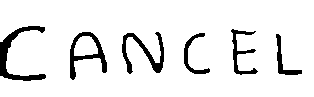

f


f


N


c


e


l


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread("/content/drive/My Drive/Handwritten_Text/cancel.jpg",cv2.IMREAD_GRAYSCALE)
h,w=img.shape
h//=4; w//=4;
img=cv2.resize(img,(w,h),interpolation = cv2.INTER_AREA)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
ret2,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(img)
w_=w//6
chars=[img[0:h,x*w_:x*w_+w_] for x in range(6)]
for char in chars:
  char=cv2.resize(char,(28,28))
  cv2_imshow(char)
  char=char.reshape(1,28,28,1)
  print(mapDict[model.predict_classes(char)[0]])


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
for F in ["0.jpg","1.jpg","2.jpg","3.jpg","4.jpg","5.jpg"]:
  string="/content/drive/My Drive/Handwritten_Text/sample/"+F
  img=cv2.imread(string,cv2.IMREAD_GRAYSCALE)
  char=cv2.resize(img,(28,28))
  ret2,char = cv2.threshold(char,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  # img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((3,3),np.uint8))
  # img = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
  cv2_imshow(char)
  char=char.reshape(1,28,28,1)
  print(mapDict[model.predict_classes(char)[0]])

I


f


n


c


k


Q


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
for F in ["0.jpg","1.jpg","2.jpg","3.jpg","4.jpg","5.jpg"]:
  string="/content/drive/My Drive/Handwritten_Text/sample/"+F
  img=cv2.imread(string,cv2.IMREAD_GRAYSCALE)
  img=cv2.resize(img,(28,28))
  ret, img = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
  cv2_imshow(img)
  img = img.reshape((-1, 28, 28))
  img=img/255
  x=np.array([img]);    
  print(model.predict_classes(x))

No. of Lines 1


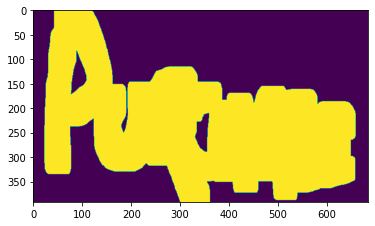

Area=  136292.0
23 0 637 392
No. of Words 1
LetterGray shape:  (392, 637, 3)
Upper:: Max, min, avg, mean::  291 0 145 167
Lower:: Max, min, avg, mean::  392 185 288 309
Max pixels at:  280


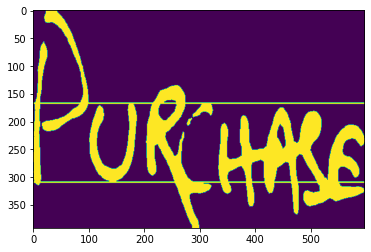

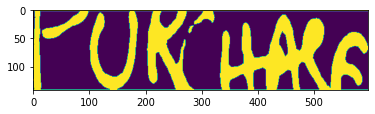

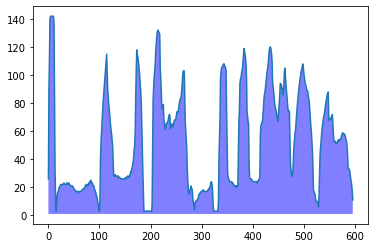

At arr Seg here:  [101, 203, 410, 530]
Difference array:  [106, 102, 31, 55]
Does it work::::


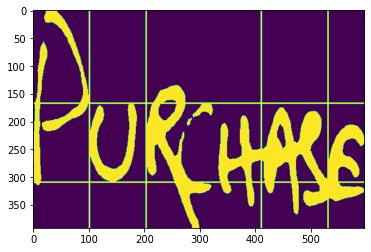

count 11242


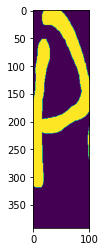

count 7516


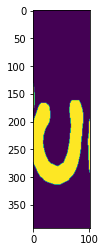

count 22908


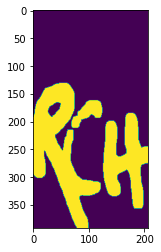

count 7189


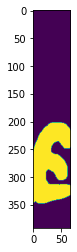

Original Image


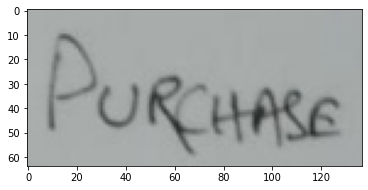

NoneType: None


In [ ]:


import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib as mpl
import traceback

mpl.rcParams['legend.fontsize'] = 10

pd.set_option('display.expand_frame_repr', False)
fn=0
path='/content/drive/My Drive/Handwritten_Text/sample/'

#Taking any image from the sample images
#In case of slanted image, straighten it using image-straighten.py, then use it
img = cv.imread('/content/drive/My Drive/Handwritten_Text/sample/37.jpg')

# In[findFeaturPoints]
def findCapPoints(img):
    cpoints=[]
    dpoints=[]
    for i in range(img.shape[1]):
        col = img[:,i:i+1]
        k = col.shape[0]
        while k > 0:
            if col[k-1]==255:
                dpoints.append((i,k))
                break
            k-=1
        
        for j in range(col.shape[0]):
            if col[j]==255:
                cpoints.append((i,j))
                break
    return cpoints,dpoints


# In[wordSegment]
#*****************************************************************************#
def wordSegment(textLines):
    wordImgList=[]
    counter=0
    cl=0
    for txtLine in textLines:
        gray = cv.cvtColor(txtLine, cv.COLOR_BGR2GRAY)
        th, threshed = cv.threshold(gray, 100, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
        final_thr = cv.dilate(threshed,None,iterations = 20)

        plt.imshow(final_thr)
        plt.show()
        
        contours, hierarchy = cv.findContours(final_thr,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
        boundingBoxes = [cv.boundingRect(c) for c in contours]
        (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0], reverse=False))
       
        for cnt in contours:
            area = cv.contourArea(cnt)
 
#            print area
            if area > 10000:
                print ('Area= ',area)
                x,y,w,h = cv.boundingRect(cnt)
                print (x,y,w,h)
                letterBgr = txtLine[0:txtLine.shape[1],x:x+w]
                wordImgList.append(letterBgr)
 
                cv.imwrite("/content/drive/My Drive/Handwritten_Text/sample/" + str(counter) +".jpg",letterBgr)
                counter=counter+1
        cl=cl+1
       
    return wordImgList
#*****************************************************************************#
    
# In[fitToSize]
#*****************************************************************************#
def fitToSize(thresh1):
    
    mask = thresh1 > 0
    coords = np.argwhere(mask)

    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top
    cropped = thresh1[x0:x1,y0:y1]
    return cropped
   
#*****************************************************************************#
    
# In[lineSegment]
#*****************************************************************************#
def lineSegment(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
   
    upper=[]
    lower=[]
    flag=True
    for i in range(threshed.shape[0]):

        col = threshed[i:i+1,:]
        cnt=0
        if flag:
            cnt=np.count_nonzero(col == 255)
            if cnt >0:
                upper.append(i)
                flag=False
        else:
            cnt=np.count_nonzero(col == 255)
            if cnt <2:
                lower.append(i)
                flag=True
    textLines=[]
    if len(upper)!= len(lower):lower.append(threshed.shape[0])
#    print upper
#    print lower
    for i in range(len(upper)):
        timg=img[upper[i]:lower[i],0:]
        
        if timg.shape[0]>5:
#            plt.imshow(timg)
#            plt.show()
            timg=cv.resize(timg,((timg.shape[1]*5,timg.shape[0]*8)))
            textLines.append(timg)

    return textLines
#*****************************************************************************#

# In[baselines]:
##******************************************************************************#
def baselines(letter2, upoints, dpoints):
##-------------------------Creating upper baseline-------------------------------##
    colu = []
    for i in range(len(upoints)):
        colu.append(upoints[i][1])
    
    maxyu = max(colu)
    minyu = min(colu)
    avgu = (maxyu + minyu) // 2
    meanu = np.around(np.mean(colu)).astype(int)
    print('Upper:: Max, min, avg, mean:: ',maxyu, minyu, avgu, meanu)
    
##-------------------------------------------------------------------------------##
##-------------------------Creating lower baseline process 1--------------------------##
    cold = []
    for i in range(len(dpoints)):
        cold.append(dpoints[i][1])
    
    maxyd = max(cold)
    minyd = min(cold)
    avgd = (maxyd + minyd) // 2
    meand = np.around(np.mean(cold)).astype(int)
    print('Lower:: Max, min, avg, mean:: ',maxyd, minyd, avgd, meand)
    
##-------------------------------------------------------------------------------##
##-------------------------Creating lower baseline process 2---------------------------##
    cn = []
    count = 0

    for i in range(h):
        for j in range(w):
            if(letterGray[i,j] == 255):
                count+=1
        if(count != 0):
            cn.append(count)
            count = 0    
    maxindex = cn.index(max(cn))
    print('Max pixels at: ',maxindex)
    
##------------------Printing upper and lower baselines-----------------------------##
    
    cv.line(letter2,(0,meanu),(w,meanu),(255,0,0),2)
    lb = 0
    if(maxindex > meand):
        lb = maxindex
        cv.line(letter2,(0,maxindex),(w,maxindex),(255,0,0),2)
    else:
        lb = meand
        cv.line(letter2,(0,meand),(w,meand),(255,0,0),2)
        
    plt.imshow(letter2)
    plt.show()
    return meanu, lb
##******************************************************************************###

# In[histogram]:
##*******************************************************************************###
def histogram(letter2, upper_baseline, lower_baseline):
    ##------------Making Histograms (Default)------------------------######
    cropped = letter2[upper_baseline:lower_baseline,0:w]
    plt.imshow(cropped)
    plt.show()
    colcnt = np.sum(cropped==255, axis=0)
    x = list(range(len(colcnt)))
    plt.plot(colcnt)
    plt.fill_between(x, colcnt, 1, facecolor='blue', alpha=0.5)
    plt.show()  
    return colcnt     
####---------------------------------------------------------------------------#####

# In[Visualize]:
##*******************************************************************************###
def visualize(letter2, upper_baseline, lower_baseline, min_pixel_threshold, min_separation_threshold, min_round_letter_threshold):
    seg = []
    seg1 = []
    seg2 = []
   ## Check if pixel count is less than min_pixel_threshold, add segmentation point
    for i in range(len(colcnt)):
      if(colcnt[i] < min_pixel_threshold):
          seg1.append(i)
          
    ## Check if 2 consequtive seg points are greater than min_separation_threshold in distance
    for i in range(len(seg1)-1):
        if(seg1[i+1]-seg1[i] > min_separation_threshold):
            seg2.append(seg1[i])

##------------Modified segmentation for removing circles----------------------------###            
    arr=[]
    for i in (seg2):
        arr1 = []
        j = upper_baseline
        while(j <= lower_baseline):
            if(letterGray[j,i] == 255):
                arr1.append(1)
            else:
                arr1.append(0)
            j+=1
        arr.append(arr1)
    print('At arr Seg here: ', seg2)
    
    ones = []
    for i in (arr):
        ones1 = []
        for j in range(len(i)):
            if (i[j] == 1):
                ones1.append([j])
        ones.append(ones1)
    
    diffarr = []
    for i in (ones):
        diff = i[len(i)-1][0] - i[0][0]
        diffarr.append(diff)
    print('Difference array: ',diffarr)
    
    for i in range(len(seg2)):
        if(diffarr[i] < min_round_letter_threshold):
            seg.append(seg2[i])
##---------------------------------------------------------------------------##
    ## Make the Cut 
    letter3=letter2
    for i in range(len(seg)):
        letter3 = cv.line(letter2,(seg[i],0),(seg[i],h),(255,0,0),2)
    
    print("Does it work::::")
    plt.imshow(letter3)
    plt.show()
    return seg 
###---------------------------------------------------------------------------#####  

# In[segmentCharacters]
def segmentCharacters(seg,lettergray):
    s=0
    wordImgList = []
    global fn
    for i in range(len(seg)):
        if i==0:
            s=seg[i]
            if s > 15:
                wordImg = lettergray[0:,0:s]
                cntx=np.count_nonzero(wordImg == 255) 
                print ('count',cntx)
                plt.imshow(wordImg)
                plt.show()
                fn=fn+1
            else:
                continue
        elif (i != (len(seg)-1)):
            if seg[i]-s > 15:
                wordImg = lettergray[0:,s:seg[i]]
                cntx=np.count_nonzero(wordImg == 255) 
                print ('count',cntx)
                plt.imshow(wordImg)
                plt.show()
                fn=fn+1
                s=seg[i]
            else:
                continue
        else:
            wordImg = lettergray[0:,seg[len(seg)-1]:]
            cntx=np.count_nonzero(wordImg == 255) 
            print ('count',cntx)
            plt.imshow(wordImg)
            plt.show()
            fn=fn+1
        wordImgList.append(wordImg)

    return wordImgList

#*****************************************************************************#
# In[Main]:
try:
    textLines=lineSegment(img)
    print ('No. of Lines',len(textLines))
    imgList=wordSegment(textLines)
    print ('No. of Words',len(imgList))
    counter = 0
    for letterGray in imgList:
        print ('LetterGray shape: ',letterGray.shape)
        gray = cv.cvtColor(letterGray, cv.COLOR_BGR2GRAY)
        th, letterGray = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
        letterGray = fitToSize(letterGray)
        letter2 = letterGray.copy()
        letterGray = cv.dilate(letterGray,None,iterations = 4)

        h = letterGray.shape[0]
        w = letterGray.shape[1]
        
        upoints, dpoints=findCapPoints(letterGray)        
        meanu, lb = baselines(letter2, upoints, dpoints)
        
##-----------Final Baseline row numbers-----------------------####
#       Ignore all points avove and below these rows 
        upper_baseline = meanu
        lower_baseline = lb
        
##--------------------Make histogram-------------------------------------###   
        
        colcnt = histogram(letter2, upper_baseline, lower_baseline)
        
###------------------------Visualize segmentation------------------------------#####        
        ## Tuning Parameters
        min_pixel_threshold = 25
        min_separation_threshold = 35
        min_round_letter_threshold = 190
        
        seg = visualize(letter2, upper_baseline, lower_baseline, min_pixel_threshold, min_separation_threshold, min_round_letter_threshold)
        wordImgList = segmentCharacters(seg,letterGray)
        for i in wordImgList:
            cv.imwrite("/content/drive/My Drive/Handwritten_Text/sample/" + str(counter) +".jpeg",i)
            counter=counter+1
        
###---------------------------------------------------------------------------#####        
        
    print('Original Image')         
    plt.imshow(img)
    plt.show()

except Exception as e:
    print ('Error Message ',e)
    cv.destroyAllWindows()
    traceback.print_exc()
    pass

traceback.print_exc() 

In [ ]:
img = np.full((1024,1024,3), 255, dtype=np.uint8)
img = cv2.fillPoly(img, contours, (0, 255, 0))
cv2_imshow(img)